<a href="https://colab.research.google.com/github/vaishnavi2460/jupyternotebook/blob/main/stockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas_datareader as pdr
key="9938fc496d5c6036a063414aa95395448f440f9d"
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
df

close     high  ...  divCash  splitFactor
symbol date                                        ...                      
AAPL   2016-05-23 00:00:00+00:00   96.43   97.190  ...      0.0          1.0
       2016-05-24 00:00:00+00:00   97.90   98.090  ...      0.0          1.0
       2016-05-25 00:00:00+00:00   99.62   99.740  ...      0.0          1.0
       2016-05-26 00:00:00+00:00  100.41  100.730  ...      0.0          1.0
       2016-05-27 00:00:00+00:00  100.35  100.470  ...      0.0          1.0
...                                  ...      ...  ...      ...          ...
       2021-05-14 00:00:00+00:00  127.45  127.890  ...      0.0          1.0
       2021-05-17 00:00:00+00:00  126.27  126.930  ...      0.0          1.0
       2021-05-18 00:00:00+00:00  124.85  126.990  ...      0.0          1.0
       2021-05-19 00:00:00+00:00  124.69  124.915  ...      0.0          1.0
       2021-05-20 00:00:00+00:00  127.31  127.720  ...      0.0          1.0

[1258 rows x 12 columns]

In [ ]:
df1=df.reset_index()['close']

In [ ]:
df1

0        96.43
1        97.90
2        99.62
3       100.41
4       100.35
         ...  
1253    127.45
1254    126.27
1255    124.85
1256    124.69
1257    127.31
Name: close, Length: 1258, dtype: float64

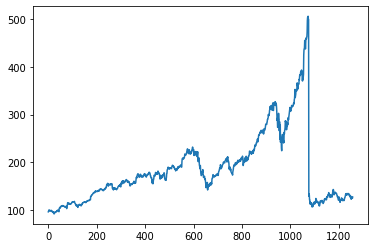

In [ ]:
plt.plot(df1)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.01060258],
       [0.01415288],
       [0.01830697],
       ...,
       [0.07924164],
       [0.07885521],
       [0.08518295]])

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 441)

In [ ]:
train_data

array([[0.01060258],
       [0.01415288],
       [0.01830697],
       [0.02021495],
       [0.02007004],
       [0.01888661],
       [0.01550537],
       [0.01371815],
       [0.01420118],
       [0.01591595],
       [0.01688202],
       [0.01666465],
       [0.01837942],
       [0.01639899],
       [0.01280039],
       [0.01309021],
       [0.01231735],
       [0.01330757],
       [0.0079459 ],
       [0.00739041],
       [0.0093467 ],
       [0.00847724],
       [0.00980558],
       [0.00328463],
       [0.        ],
       [0.00374351],
       [0.00569979],
       [0.008598  ],
       [0.00929839],
       [0.00712474],
       [0.00842893],
       [0.00941915],
       [0.01120638],
       [0.01193093],
       [0.0129936 ],
       [0.01166526],
       [0.01630238],
       [0.01627823],
       [0.01881415],
       [0.01891076],
       [0.01912812],
       [0.01784809],
       [0.01598841],
       [0.01280039],
       [0.01118222],
       [0.02634947],
       [0.02970656],
       [0.029

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 36s 119ms/step - loss: 0.0194 - val_loss: 0.0377
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0024 - val_loss: 0.0246
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.0013 - val_loss: 0.0233
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 6.1499e-04 - val_loss: 0.0202
Epoch 5/100
12/12 [==============================] - 0s 17ms/step - loss: 4.8036e-04 - val_loss: 0.0212
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 4.0979e-04 - val_loss: 0.0207
Epoch 7/100
12/12 [==============================] - 0s 17ms/step - loss: 3.7546e-04 - val_loss: 0.0194
Epoch 8/100
12/12 [==============================] - 0s 19ms/step - loss: 3.9614e-04 - val_loss: 0.0186
Epoch 9/100
12/12 [==============================] - 0s 17ms/step - loss: 3.8429e-04 - val_loss: 0.0187
Epoch 10/100
12/12 [==============================] - 0s 17ms/step - loss:

In [ ]:
tf.__version__

'2.4.1'

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

171.3633497406468

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

243.17401539904276

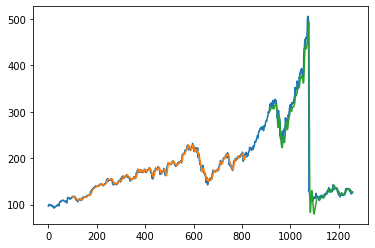

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

441

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.1078372177273276,
 0.10344161333172322,
 0.10066417099384131,
 0.09817654872599926,
 0.09025480014491002,
 0.09411906774544135,
 0.08346818017147686,
 0.09390170269291145,
 0.09663084168578676,
 0.08921627822726722,
 0.08878154812220748,
 0.09382924767540149,
 0.08904721651974398,
 0.08477237048665617,
 0.08643883588938531,
 0.0965825383407801,
 0.10827194783238739,
 0.11358531578311795,
 0.12288370969689646,
 0.12346334983697618,
 0.1208066658616109,
 0.10880328462746044,
 0.09641347663325686,
 0.10167854123898076,
 0.10373143340176308,
 0.10119550778891437,
 0.10952783480256004,
 0.10800627943485083,
 0.10836855452240066,
 0.10619490399710177,
 0.10469750030189587,
 0.10406955681680954,
 0.10464919695688926,
 0.0993841323511653,
 0.09370848931288492,
 0.09097935032000967,
 0.0913657770800628,
 0.08201907982127762,
 0.0816809564062311,
 0.08044922110856176,
 0.06991909189711384,
 0.07057118705470353,
 0.0863422291993721,
 0.0798937326409854,
 0.07250332085496922,
 0.067842048061828

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.08274543]
101
1 day input [0.10344161 0.10066417 0.09817655 0.0902548  0.09411907 0.08346818
 0.0939017  0.09663084 0.08921628 0.08878155 0.09382925 0.08904722
 0.08477237 0.08643884 0.09658254 0.10827195 0.11358532 0.12288371
 0.12346335 0.12080667 0.10880328 0.09641348 0.10167854 0.10373143
 0.10119551 0.10952783 0.10800628 0.10836855 0.1061949  0.1046975
 0.10406956 0.1046492  0.09938413 0.09370849 0.09097935 0.09136578
 0.08201908 0.08168096 0.08044922 0.06991909 0.07057119 0.08634223
 0.07989373 0.07250332 0.06784205 0.07095761 0.05873687 0.07014853
 0.06747977 0.0722618  0.0700157  0.07716459 0.08098056 0.07902427
 0.06880811 0.06750392 0.07571549 0.0736626  0.06774544 0.06895302
 0.07045043 0.07088516 0.06728656 0.07272069 0.07477358 0.08177756
 0.08252626 0.0866079  0.09254921 0.09891317 0.09467456 0.10237894
 0.09658254 0.102548   0.10172684 0.10336916 0.09919092 0.10013283
 0.09636517 0.10211327 0.10307934 0.10228233 0.10032605 0.10008453
 0.09520589 0.09781427 0.08648714 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

1258

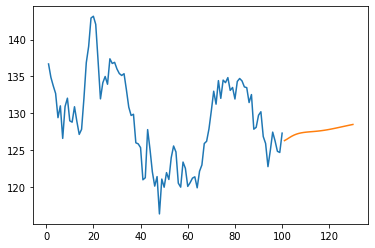

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

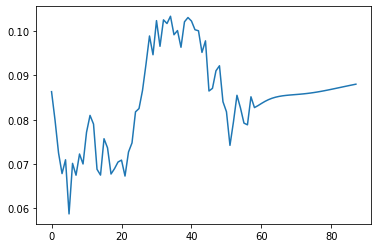

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

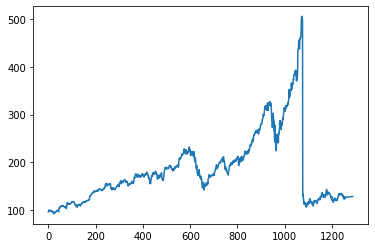

In [ ]:
plt.plot(df3)